**Task 2: Exploratory Data Analysis (EDA)** Visualize historical trends and the impact of key events (like the M-Pesa launch) on financial inclusion metrics.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [31]:
try:
    df = pd.read_csv('/content/ethiopia_fi_unified_data.csv')
    refs = pd.read_csv('/content/reference_codes - reference_codes.csv')
    print("✅ All datasets loaded successfully!")
except FileNotFoundError:
    print("Error: Files not found. Please ensure they are in the working directory.")

✅ All datasets loaded successfully!


In [41]:
observations = enriched_df[enriched_df['record_type'] == 'observation'].copy()
events = enriched_df[enriched_df['record_type'] == 'event'].copy()

In [42]:
def plot_trend_with_events(indicator_code, title):
    # Filter for specific indicator
    subset = observations[observations['indicator_code'] == indicator_code].sort_values('observation_date')

    if subset.empty:
        print(f"No data for {indicator_code}")
        return

    plt.figure(figsize=(12, 6))

    # Plot Line
    sns.lineplot(data=subset, x='observation_date', y='value_numeric', marker='o', label='Observed Data', color='blue')

    # Overlay Events
    # We filter events that might impact this indicator (policy, product launches)
    relevant_events = events[events['observation_date'].between(subset['observation_date'].min(), pd.Timestamp('2026-01-01'))]

    for _, event in relevant_events.iterrows():
        plt.axvline(x=event['observation_date'], color='red', linestyle='--', alpha=0.3)
        # Add label slightly rotated
        plt.text(event['observation_date'], subset['value_numeric'].mean(),
                 str(event['indicator'])[:15], rotation=90, verticalalignment='center', fontsize=8, color='darkred')

    plt.title(f"Trend: {title}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

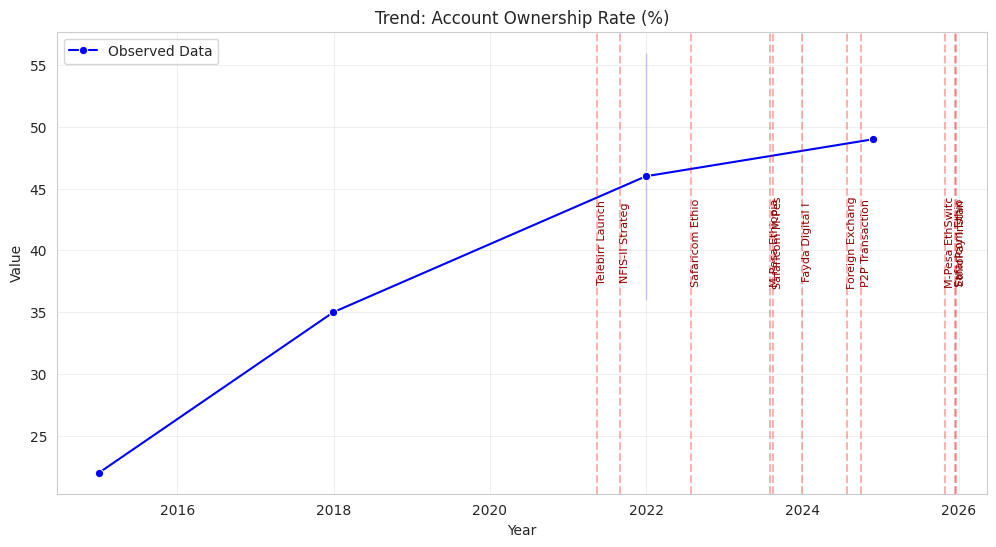

In [43]:
plot_trend_with_events('ACC_OWNERSHIP', 'Account Ownership Rate (%)')

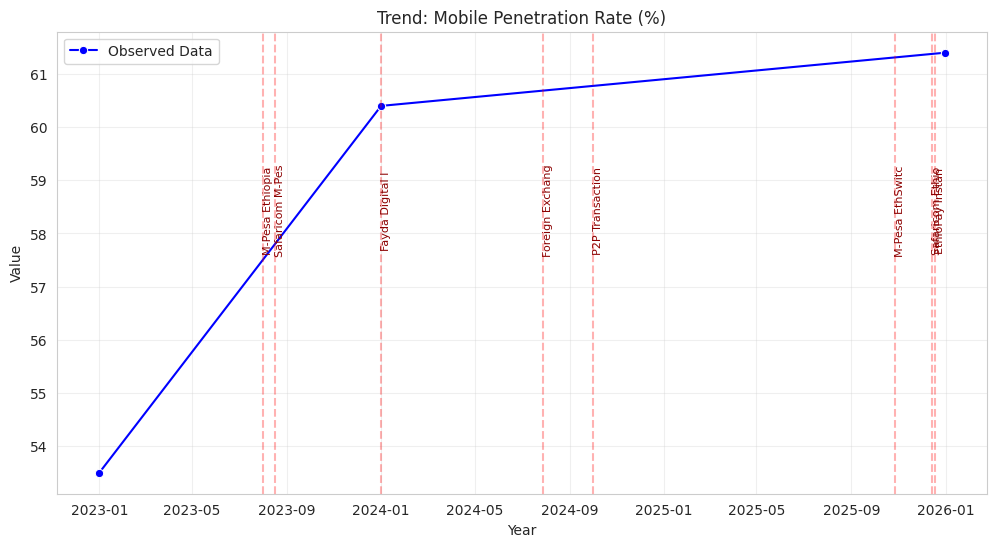

In [44]:
plot_trend_with_events('ACC_MOBILE_PEN', 'Mobile Penetration Rate (%)')